In [1]:
#This program uses an artificial recurrent neural network called Long Term Memory (LSTM) to predict the closing stock price of a
# corporation using the past 60 day stock price

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
#Get the stock quote
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2021-06-04')
#Printing the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-05-28,125.800003,124.550003,125.570000,124.610001,71311100.0,124.610001
2021-06-01,125.349998,123.940002,125.080002,124.279999,67637100.0,124.279999
2021-06-02,125.239998,124.050003,124.279999,125.059998,59278900.0,125.059998


In [9]:
#Getting the number of rows and columns
df.shape

(2371, 6)

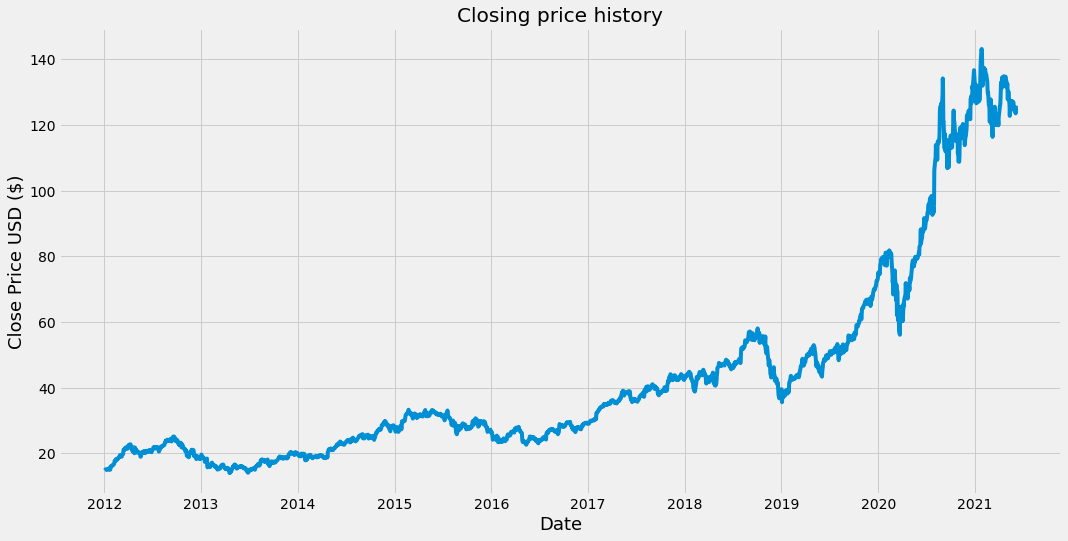

In [10]:
#visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [12]:
#Creating a new data column with only the "Close cloumn"
data=df.filter(['Close'])
#converting the dataframes to a numpy array
dataset=data.values
#getting the number of rows to train the model on
training_data_len= math.ceil(len(dataset) * 0.8)
training_data_len

1897

In [13]:
#scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.85992063],
       [0.84815709],
       [0.86634417]])

In [15]:
#Creating the training data set
#Along with the scaled training set
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [16]:
#Converting Both these values of x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [17]:
#Reshaping the data
#LSTM data model expects the data to be three dimensional in the form of number of samples , number of time stamps and number of features.
#But right now the x_train data set is two dimensional. So if i/we find the output of x_train.shape it will only give 2 values. That is the 
# the number of rows and columns. And the LSTM models is expecting a three dimensional data
x_train.shape

(1837, 60)

In [18]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1837, 60, 1)

In [20]:
#Building the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
#Compiling the Model
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
#Training the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1837/1837 [==============================] - 47s 17ms/step - loss: 6.3022e-04


In [23]:
#Creating a testing dataset
#create a new array containing scaled values from index 1837 to 2371
test_data=scaled_data[training_data_len-60:,:]
#Creating the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [24]:
#Convertin the data to a numpy array again
x_test=np.array(x_test)

In [25]:
#Rewshaping the data set because it is two dimensional while LSTM model expects it to be three dimensional
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [26]:
#geting the models predicted price values
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions) #unsclaling the values

In [27]:
#get the root mean squared error (RMSE)-----> Lower values of RMSE indicates a better fit. For now I will use RMSE 
#But it is always better to check the model with other metrics as well to check the efficiency of the model 
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

15.188832005368003

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

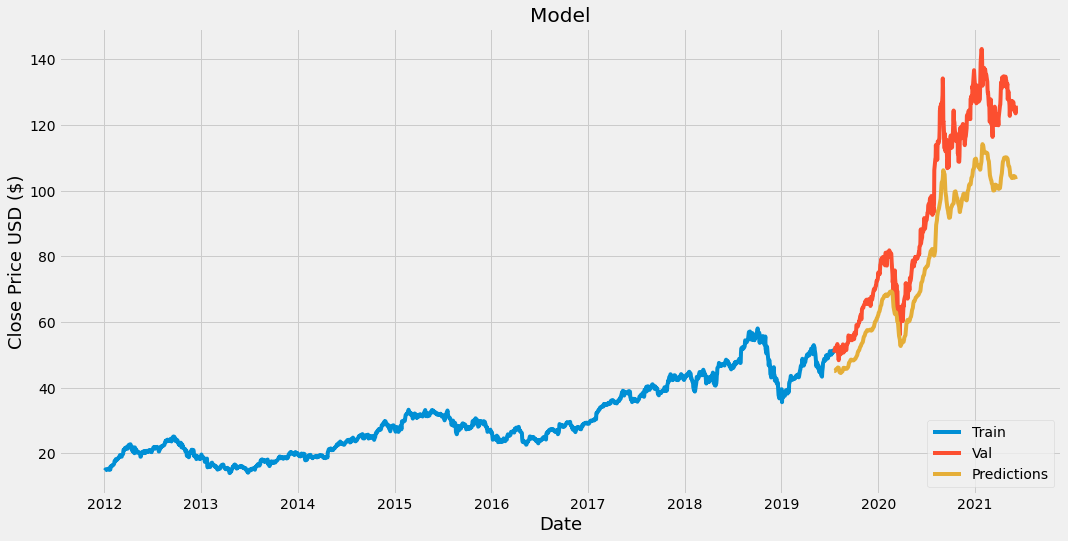

In [28]:
#Plotting the Data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show

In [29]:
#show th4e valid and predicted price
valid

,Close,Predictions
Date,,
2019-07-19,50.647499,45.028297
2019-07-22,51.805000,45.036743
2019-07-23,52.209999,45.128792
2019-07-24,52.167500,45.291428
2019-07-25,51.755001,45.464214
...,...,...
2021-05-28,124.610001,104.430313
2021-06-01,124.279999,104.235710
2021-06-02,125.059998,103.960526


In [30]:
#get the quote 
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2021-06-04')
#Creating a new dataframe
new_df=apple_quote.filter(['Close'])
#Getting the last 60 days closing price values and convert the data frame to a time array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 nand 1
last_60_days_scaled=scaler.transform(last_60_days)
#creating an empty list
X_test=[]
#Appending the past 60 days
X_test.append(last_60_days_scaled)
#Converting the X_test data set to a numpy array
X_test=np.array(X_test)
#Reshape the data
X_test =np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Getting the predicted scale price
pred_price=model.predict(X_test)
#Undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[103.44247]]


In [31]:
#get the quote 
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2021-06-05',end='2021-06-05')
print(apple_quote2['Close'])

Date
2021-06-04    125.889999
Name: Close, dtype: float64
